# Importing and Loading packages

### First, we need to install the package "here" so that we can call all mudules without thinking about path. 

### Then, we can load and install the rest of the packages from the file module.R 


In [45]:
#install.packages("here")
library(here, help, pos = 2, lib.loc = NULL)
source(here('Modules','modules.R'))
#install_all_packages()
load_library_packages()

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[12]]
[1] TRUE

[[13]]
[1] TRUE

[[14]]
[1] TRUE

[[15]]
[1] TRUE

[[16]]
[1] TRUE

[[17]]
[1] TRUE

[[18]]
[1] TRUE

[[19]]
[1] TRUE

[[20]]
[1] TRUE

[[21]]
[1] TRUE

[[22]]
[1] TRUE

[[23]]
[1] TRUE

[[24]]
[1] TRUE

[[25]]
[1] TRUE

[[26]]
[1] TRUE

[[27]]
[1] TRUE

[[28]]
[1] TRUE

# Importing and Exploring the Dataset

In [46]:
before_dataset <- read_excel(path = here('Data','before_pa.xlsx'))
before_dataset <- data.frame(before_dataset)
dim(before_dataset)
unique(sapply(before_dataset, class))
head(before_dataset)


[1] 1226   86

[1] "numeric"

,PA_practice_during,sex,age_range,martialStatus,state,zone,co.resident_range,rooms_range,income_range,scholarity,...,PA_easiness_home_equipament_before,PA_easiness_others_before,PA_barriers_before_time_family_responsabilities,PA_barriers_before_tiredness,PA_barriers_before_location_distance,PA_barriers_before_money,PA_barriers_before_time_convenience,PA_barriers_before_hard_task,PA_barriers_before_interest,PA_barriers_before_none
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,2,1,25,2,1,1,4,4,...,0,0,0,0,0,0,1,0,0,0
2,0,2,3,1,21,1,2,3,6,4,...,0,0,0,1,0,0,0,0,0,0
3,0,1,3,1,21,1,2,2,5,3,...,0,0,0,0,0,1,0,0,0,0
4,0,1,3,1,21,1,1,1,3,4,...,0,0,0,0,0,0,1,0,0,0
5,0,1,2,2,25,2,2,2,6,4,...,0,0,1,0,0,0,0,0,0,0
6,0,2,3,2,21,1,2,2,6,6,...,0,0,1,0,0,0,0,0,0,0


# Adding new Columns

In [47]:
sports = c('running_before','hiking_before','cycling_before','muscle_training_before',
'soccer_before','tennis_before','volleyball_before','basketball_before',
'swimming_before','surfing_before','yoga_before','pilates_before',
'fighting_before','other_sports_before')
    
before_dataset[, "pa_number_before"] = rowSums(before_dataset[, sports])

# Treating missing data

### As the dataset had little missing data, we chose to omit them

In [48]:
before_dataset <- before_dataset[complete.cases(before_dataset), ]
dim(before_dataset)


[1] 1226   87

# Treating variables type

In [49]:
before_dataset$PA_practice_before[before_dataset$PA_practice_before == 0] <- "practice"
before_dataset$PA_practice_before[before_dataset$PA_practice_before == 1] <- "dont_practice"
before_dataset$PA_practice_during[before_dataset$PA_practice_during == 0] <- "practice"
before_dataset$PA_practice_during[before_dataset$PA_practice_during == 1] <- "dont_practice"

before_dataset$PA_intensity_before[before_dataset$PA_intensity_before == 4] <- 0
before_dataset$PA_duration_before[before_dataset$PA_duration_before == 5] <- 0


In [50]:
numeric_columns = c(
    'age_range',
    'rooms_range',
    'income_range',
    'scholarity',
    'sedentary_time_range_before',
    'co.resident_range',
    "PA_weekly_frequency_before",
    'PA_intensity_before',
    'PA_duration_before',
    "pa_number_before"
)
columns = names(before_dataset)
categorical_columns <- columns[!columns %in% numeric_columns]


before_dataset[, categorical_columns] <- lapply(before_dataset[, categorical_columns], as.factor)
before_dataset[, numeric_columns] <- lapply(before_dataset[, numeric_columns], as.integer)


before_dataset[1, 2] < before_dataset[2, 2] 

head(before_dataset[, numeric_columns])


Warning message in Ops.factor(before_dataset[1, 2], before_dataset[2, 2]):
"'<' not meaningful for factors"


[1] NA

,age_range,rooms_range,income_range,scholarity,sedentary_time_range_before,co.resident_range,PA_weekly_frequency_before,PA_intensity_before,PA_duration_before,pa_number_before
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2,1,4,4,4,1,4,1,2,1
2,3,3,6,4,3,2,3,2,3,4
3,3,2,5,3,1,2,2,3,2,2
4,3,1,3,4,2,1,4,3,3,2
5,2,2,6,4,4,2,4,3,3,2
6,3,2,6,6,2,2,3,2,2,3


In [51]:
lapply(before_dataset, levels)[c("DA", "DP")]
before_dataset <- subset(before_dataset, select = columns[!columns %in% c('DA', 'DP', 'state', 'zone')])

$<NA>
NULL

$<NA>
NULL

# Sanity Check

### More then one column have the class "dont_practice", we need to check if they agree.

In [52]:
table(before_dataset[, c("PA_practice_before", "PA_duration_before")])
table(before_dataset[, c("PA_practice_before", "PA_intensity_before")])
table(before_dataset[, c("PA_practice_before", "PA_weekly_frequency_before")])
table(before_dataset[, c("PA_practice_before", "pa_number_before")])


                  PA_duration_before
PA_practice_before   0   1   2   3   4
     dont_practice 129   8   4   2   0
     practice        4  57 649 318  55

                  PA_intensity_before
PA_practice_before   0   1   2   3
     dont_practice 129  14   0   0
     practice        2 145 584 352

                  PA_weekly_frequency_before
PA_practice_before   1   2   3   4
     dont_practice 142   0   1   0
     practice        1 419 466 197

                  pa_number_before
PA_practice_before   0   1   2   3   4   5   6   7   9
     dont_practice 142   1   0   0   0   0   0   0   0
     practice        0 380 361 215  95  22   4   5   1

In [53]:
differ_dp <- ( before_dataset$PA_duration_before != 0 
                | before_dataset$PA_intensity_before != 0 
                | before_dataset$PA_weekly_frequency_before != 1 
                | before_dataset$pa_number_before != 0
            ) 
strange_dp <- before_dataset$PA_practice_before == "dont_practice" & differ_dp 

table(strange_dp)
# before_dataset <- before_dataset[!strange_dp,]

strange_dp
FALSE  TRUE 
 1211    15 

In [54]:
differ_p <- (   before_dataset$PA_duration_before == 0 
                | before_dataset$PA_intensity_before == 0 
                | before_dataset$PA_weekly_frequency_before == 1
                | before_dataset$pa_number_before == 0
            )
strange_p <- before_dataset$PA_practice_before == "practice" & differ_p
table(strange_p)
# before_dataset <- before_dataset[!strange_p,]


strange_p
FALSE  TRUE 
 1221     5 

### We found out that some columns have bias

# Unsupervised Learning

In [55]:
before_dataset_copy <- before_dataset
before_dataset_copy[, "strange_dp"] <- strange_dp
before_dataset_copy[, "strange_p"] <- strange_p
has_GAD_depression <- before_dataset$GAD == "1" | before_dataset$depression  == "1" 
before_dataset_copy[, "has_GAD_depression"] <- has_GAD_depression

dummy <- dummyVars(" ~ .", data=before_dataset)
encoded_dataset <- data.frame(predict(dummy, newdata = before_dataset)) 

## PCA

In [56]:
encoded_dataset.pca <- prcomp(encoded_dataset , center = TRUE,scale. = TRUE)
summary(encoded_dataset.pca) 

Importance of components:
                           PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.96556 2.39524 2.29879 2.16209 2.04970 1.99503 1.95289
Proportion of Variance 0.04997 0.03260 0.03003 0.02656 0.02387 0.02261 0.02167
Cumulative Proportion  0.04997 0.08257 0.11259 0.13915 0.16302 0.18564 0.20731
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     1.90452 1.82116 1.81249 1.76081 1.73274 1.70054 1.67768
Proportion of Variance 0.02061 0.01884 0.01867 0.01762 0.01706 0.01643 0.01599
Cumulative Proportion  0.22792 0.24676 0.26543 0.28304 0.30010 0.31653 0.33252
                          PC15    PC16    PC17    PC18    PC19    PC20   PC21
Standard deviation     1.63781 1.63068 1.61778 1.60227 1.59366 1.57371 1.5528
Proportion of Variance 0.01524 0.01511 0.01487 0.01459 0.01443 0.01407 0.0137
Cumulative Proportion  0.34776 0.36287 0.37774 0.39233 0.40676 0.42083 0.4345
                         PC22 

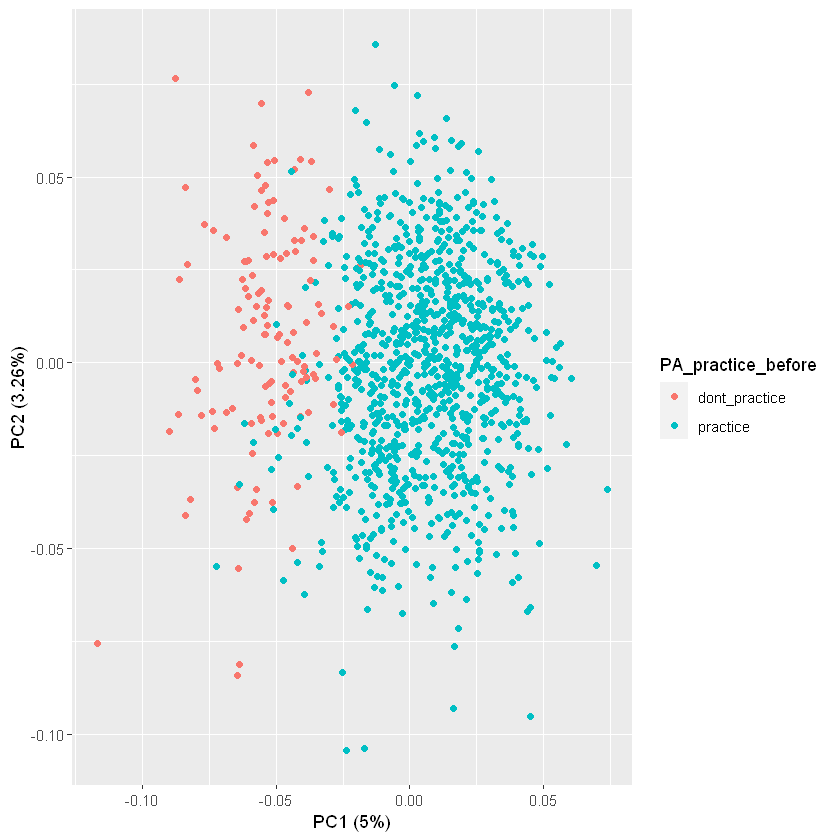

In [57]:
autoplot(encoded_dataset.pca, colour="PA_practice_before", data=before_dataset)

## TSNE

In [58]:
tsne <- Rtsne(encoded_dataset, dims = 2, perplexity=30, check_duplicates = FALSE, verbose=TRUE)

Performing PCA
Read the 1226 x 50 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.17 seconds (sparsity = 0.102636)!
Learning embedding...
Iteration 50: error is 71.569534 (50 iterations in 0.16 seconds)
Iteration 100: error is 71.567361 (50 iterations in 0.16 seconds)
Iteration 150: error is 71.148887 (50 iterations in 0.15 seconds)
Iteration 200: error is 71.125280 (50 iterations in 0.11 seconds)
Iteration 250: error is 71.125312 (50 iterations in 0.10 seconds)
Iteration 300: error is 2.184420 (50 iterations in 0.12 seconds)
Iteration 350: error is 1.990204 (50 iterations in 0.12 seconds)
Iteration 400: error is 1.915054 (50 iterations in 0.13 seconds)
Iteration 450: error is 1.875717 (50 iterations in 0.13 seconds)
Iteration 500: error is 1.852794 (50 iterations in 0.13 seconds)
Iteration 550: error is 1.838945 (50 iterations in 0.13 seconds)
Iteration 60

### Practive before x dont Practice before

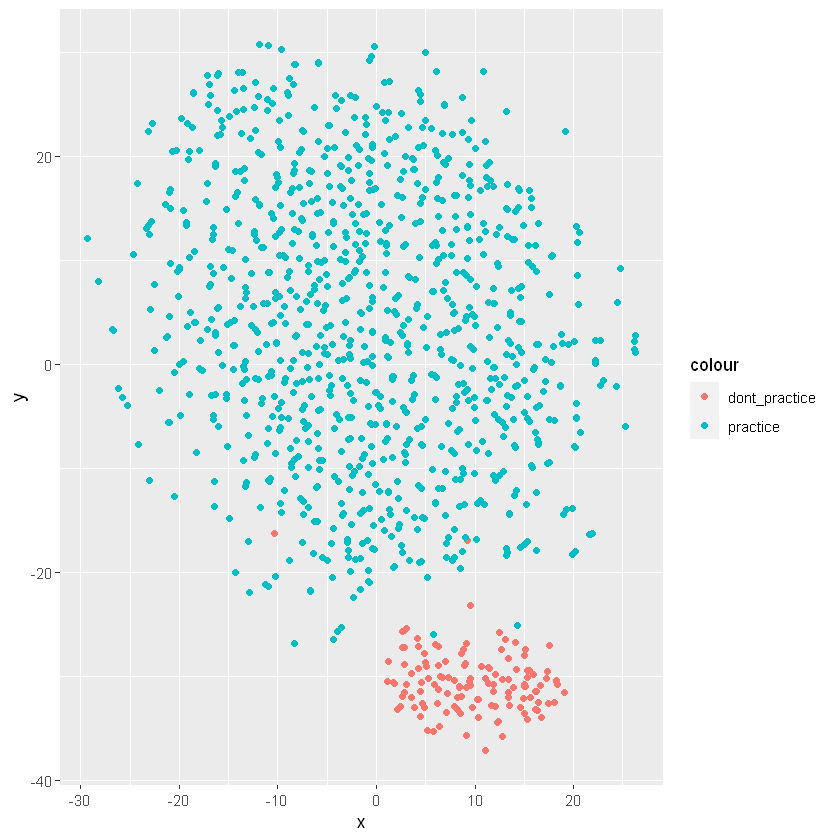

In [103]:
metadata <- data.frame(sample_id = rownames(before_dataset_copy),
                       colour = before_dataset_copy$PA_practice_before)
tsne_df <- data.frame(
    x = tsne$Y[,1],
    y = tsne$Y[,2],
    colour = metadata$colour)

ggplot(tsne_df, aes(x, y, colour = colour)) + geom_point()

### Strange dont practice

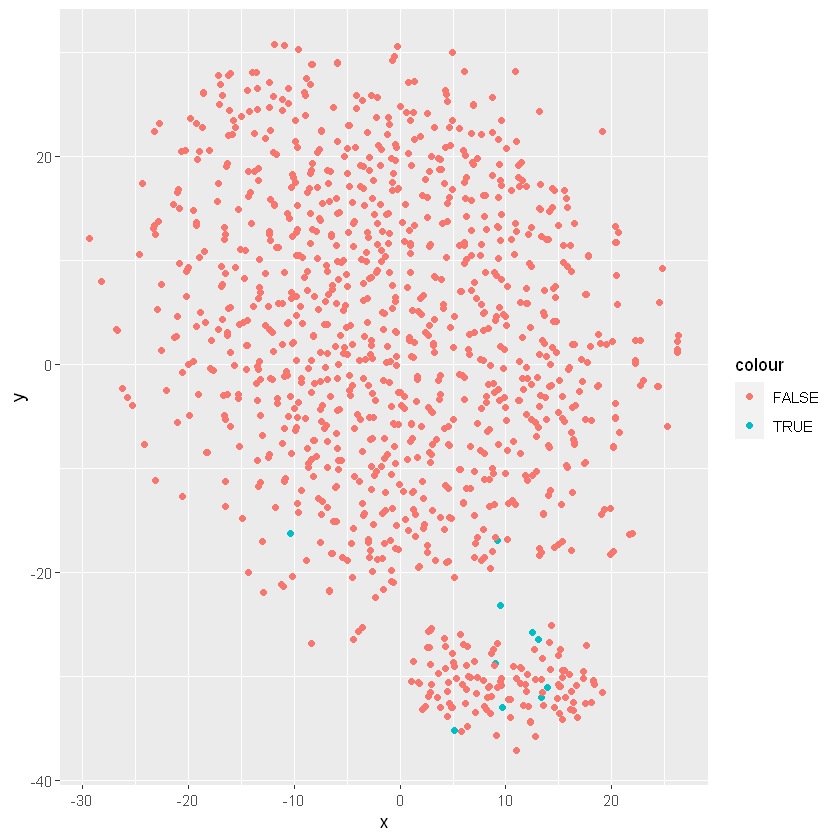

In [60]:
metadata <- data.frame(sample_id = rownames(before_dataset_copy),
                       colour = before_dataset_copy$strange_dp)
tsne_df <- data.frame(
    x = tsne$Y[,1],
    y = tsne$Y[,2],
    colour = metadata$colour)

ggplot(tsne_df, aes(x, y, colour = colour)) + geom_point()

### Strange practice

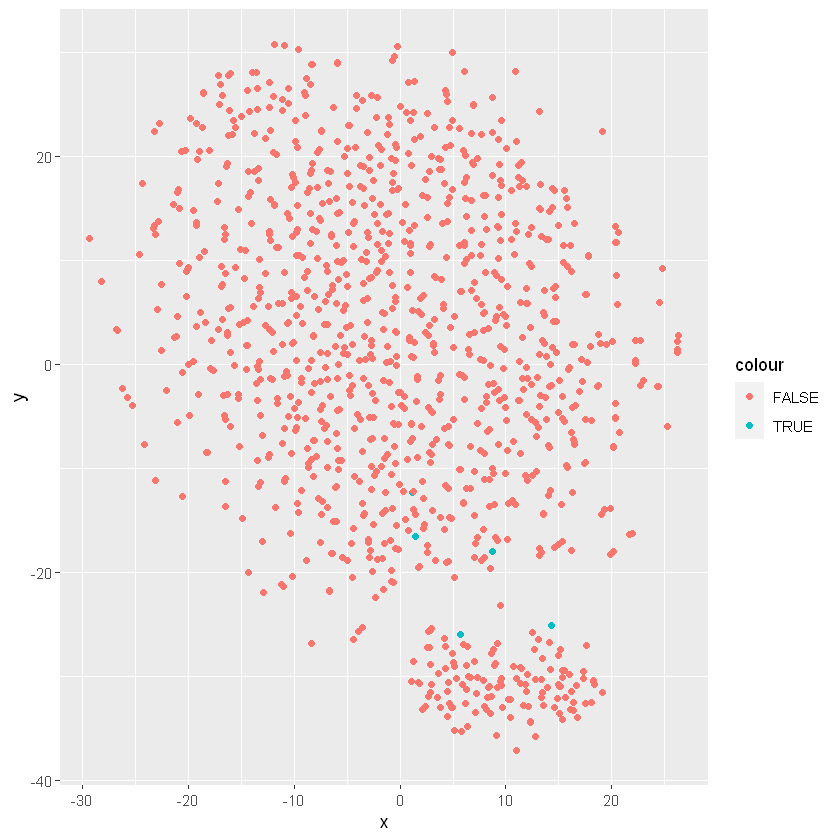

In [61]:
metadata <- data.frame(sample_id = rownames(before_dataset_copy),
                       colour = before_dataset_copy$strange_p)
tsne_df <- data.frame(
    x = tsne$Y[,1],
    y = tsne$Y[,2],
    colour = metadata$colour)

ggplot(tsne_df, aes(x, y, colour = colour)) + geom_point()

### Has GAD or depression

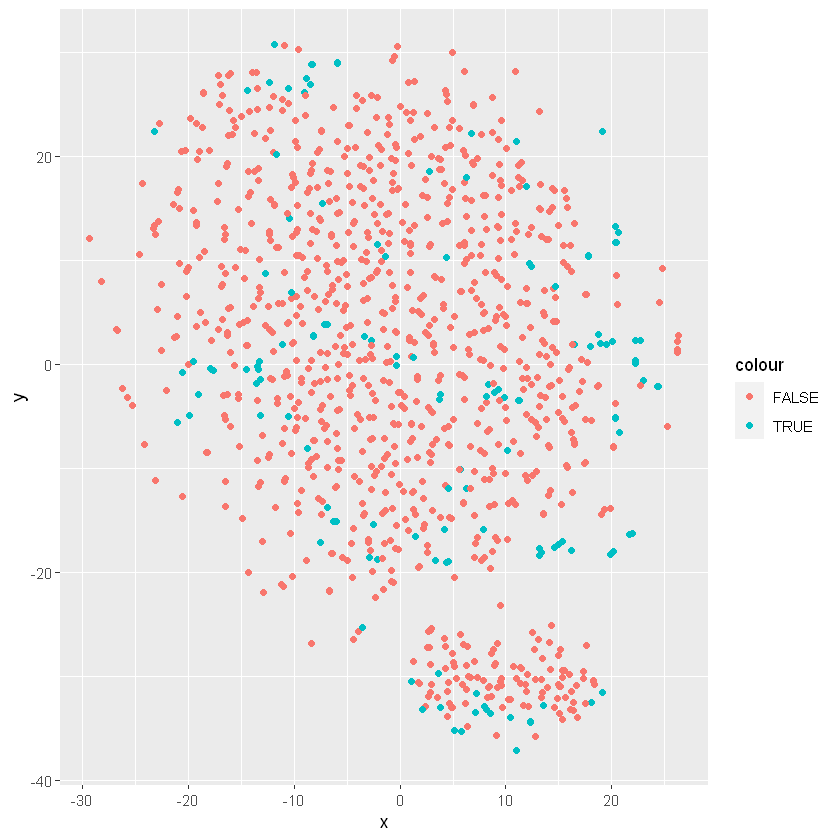

In [62]:
metadata <- data.frame(sample_id = rownames(before_dataset_copy),
                       colour = before_dataset_copy$has_GAD_depression)
tsne_df <- data.frame(
    x = tsne$Y[,1],
    y = tsne$Y[,2],
    colour = metadata$colour)

ggplot(tsne_df, aes(x, y, colour = colour)) + geom_point()

# Decision Trees for people with and without GAD and depression

## Finding out the majority class


In [63]:
table(before_dataset[, "PA_practice_during"])


dont_practice      practice 
          338           888 

## Creating the dataset partition

In [64]:
set.seed(2)
lista_treino <- createDataPartition(before_dataset$PA_practice_during, p=0.7, list=FALSE)
treino <- before_dataset[lista_treino,]
teste <- before_dataset[-lista_treino,]



## Applying augmentation into the training set

In [65]:
treino.aug <- data_augmentation(
    train_data=treino,
    yname="PA_practice_during",
    maj_class = "practice",
    min_classes = c("dont_practice"),
    ycol=match("PA_practice_during",names(before_dataset))
)

table(treino.aug[, "PA_practice_during"])



dont_practice      practice 
          622           622 

## Kappa metric without augmentation

Confusion Matrix and Statistics

               Reference
Prediction      dont_practice practice
  dont_practice            38       21
  practice                 63      245
                                          
               Accuracy : 0.7711          
                 95% CI : (0.7247, 0.8131)
    No Information Rate : 0.7248          
    P-Value [Acc > NIR] : 0.0253          
                                          
                  Kappa : 0.3413          
                                          
 Mcnemar's Test P-Value : 7.696e-06       
                                          
            Sensitivity : 0.3762          
            Specificity : 0.9211          
         Pos Pred Value : 0.6441          
         Neg Pred Value : 0.7955          
             Prevalence : 0.2752          
         Detection Rate : 0.1035          
   Detection Prevalence : 0.1608          
      Balanced Accuracy : 0.6486          
                                          
       '

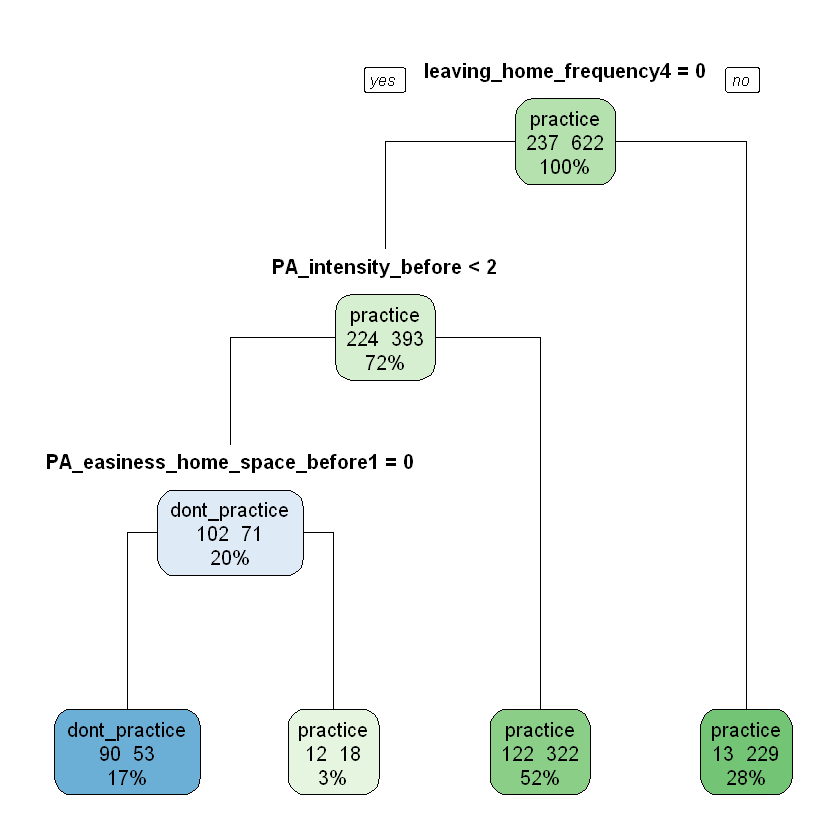

In [66]:
model <- fit_model(
    model_method="rpart",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv"),
    train_data = treino,
    test_data=teste,
    yname="PA_practice_during",
    length = 3
)
print(model$matrix)
# print(model$result)
rpart.plot(model$result$finalModel, type=1, extra=101)



In [67]:
print(model$result)

CART 

859 samples
 84 predictor
  2 classes: 'dont_practice', 'practice' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 773, 773, 773, 773, 773, 774, ... 
Resampling results across tuning parameters:

  cp          Accuracy   Kappa    
  0.02109705  0.7461643  0.2861515
  0.02531646  0.7461643  0.2845634
  0.06540084  0.7299788  0.1602493

Kappa was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.02109705.


## Kappa metric with augmentation

Confusion Matrix and Statistics

               Reference
Prediction      dont_practice practice
  dont_practice            56       44
  practice                 45      222
                                          
               Accuracy : 0.7575          
                 95% CI : (0.7103, 0.8005)
    No Information Rate : 0.7248          
    P-Value [Acc > NIR] : 0.08822         
                                          
                  Kappa : 0.3902          
                                          
 Mcnemar's Test P-Value : 1.00000         
                                          
            Sensitivity : 0.5545          
            Specificity : 0.8346          
         Pos Pred Value : 0.5600          
         Neg Pred Value : 0.8315          
             Prevalence : 0.2752          
         Detection Rate : 0.1526          
   Detection Prevalence : 0.2725          
      Balanced Accuracy : 0.6945          
                                          
       '

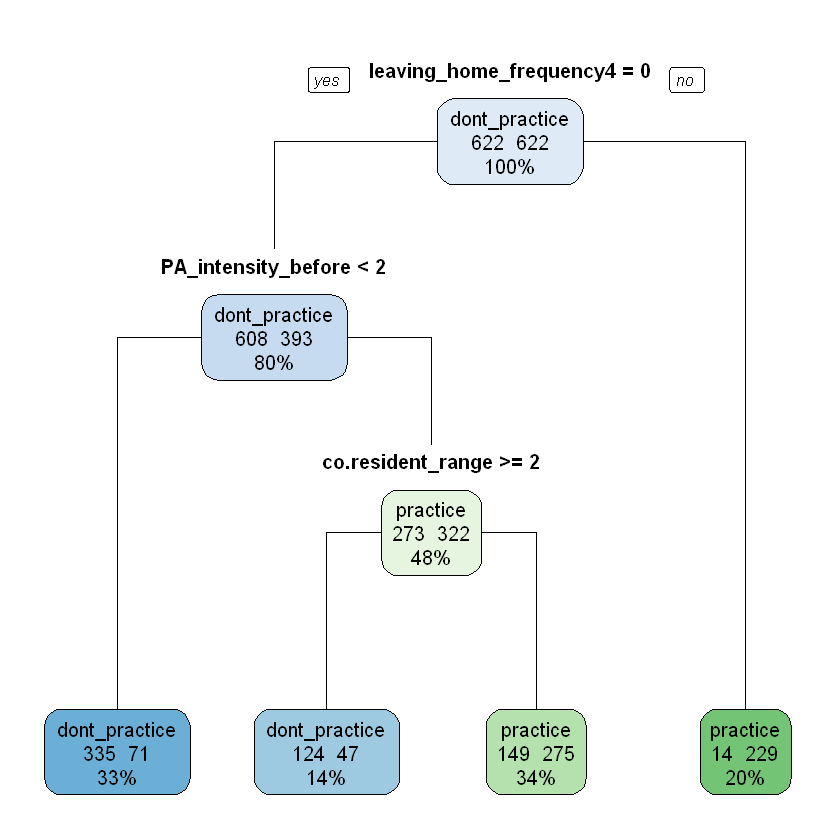

In [68]:
model <- fit_model(
    model_method="rpart",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv"),
    train_data = treino.aug,
    test_data=teste,
    yname="PA_practice_during",
    length=3
)
print(model$matrix)
rpart.plot(model$result$finalModel, type=1, extra=101)

In [69]:
print(model$result)

CART 

1244 samples
  84 predictor
   2 classes: 'dont_practice', 'practice' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 1120, 1120, 1120, 1120, 1120, 1120, ... 
Resampling results across tuning parameters:

  cp          Accuracy   Kappa    
  0.03536977  0.7748839  0.5498665
  0.10128617  0.7090065  0.4181227
  0.34565916  0.5594323  0.1205215

Kappa was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.03536977.


## F-beta score without augmentation

In [70]:
fbeta <- function (data, lev=NULL, model = NULL){
    fb_val <- FBeta_Score(data$obs, data$pred, positive="practice", beta = 0.1)
    c(FB = fb_val)
}

Confusion Matrix and Statistics

               Reference
Prediction      dont_practice practice
  dont_practice            38       21
  practice                 63      245
                                          
               Accuracy : 0.7711          
                 95% CI : (0.7247, 0.8131)
    No Information Rate : 0.7248          
    P-Value [Acc > NIR] : 0.0253          
                                          
                  Kappa : 0.3413          
                                          
 Mcnemar's Test P-Value : 7.696e-06       
                                          
            Sensitivity : 0.3762          
            Specificity : 0.9211          
         Pos Pred Value : 0.6441          
         Neg Pred Value : 0.7955          
             Prevalence : 0.2752          
         Detection Rate : 0.1035          
   Detection Prevalence : 0.1608          
      Balanced Accuracy : 0.6486          
                                          
       '

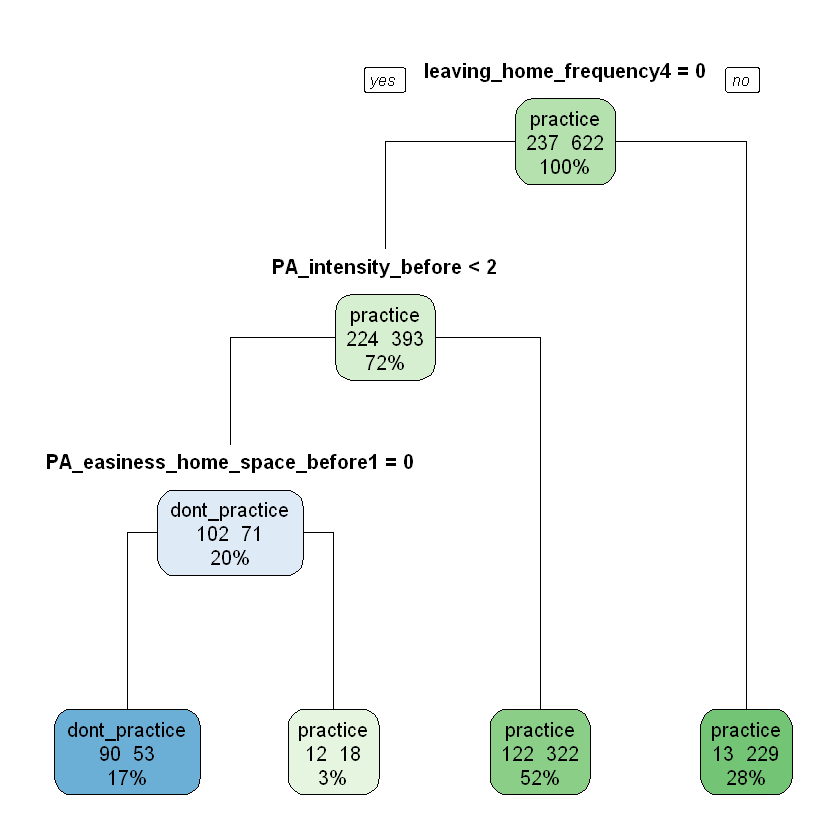

In [71]:
model <- fit_model(
    model_method="rpart",
    model_metric="FB",
    trControl_func = trainControl(method = "cv", summaryFunction=fbeta, classProbs = TRUE),
    train_data = treino,
    test_data=teste,
    yname="PA_practice_during"
)
print(model$matrix)
rpart.plot(model$result$finalModel, type=1, extra=101)

In [72]:
gini = varImp(model$result$finalModel)
#gini[order(gini)]
head(gini, 20)
# plot(varImp(model$result$finalModel), main="Variables Importance - Decision Tree") 

,Overall
,<dbl>
covid.presented_symptoms_suspicion1,2.457483
hypertension1,2.234082
isolation.sleep_quality2,2.311031
leaving_home_frequency2,26.440498
leaving_home_frequency4,33.264103
PA_duration_before,39.519487
PA_easiness_home_activity_before1,2.229903
PA_easiness_home_space_before1,2.609257
PA_intensity_before,56.099308


## F-beta score with augmentation

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."


Confusion Matrix and Statistics

               Reference
Prediction      dont_practice practice
  dont_practice            99      161
  practice                  2      105
                                          
               Accuracy : 0.5559          
                 95% CI : (0.5034, 0.6074)
    No Information Rate : 0.7248          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.2519          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.9802          
            Specificity : 0.3947          
         Pos Pred Value : 0.3808          
         Neg Pred Value : 0.9813          
             Prevalence : 0.2752          
         Detection Rate : 0.2698          
   Detection Prevalence : 0.7084          
      Balanced Accuracy : 0.6875          
                                          
       '

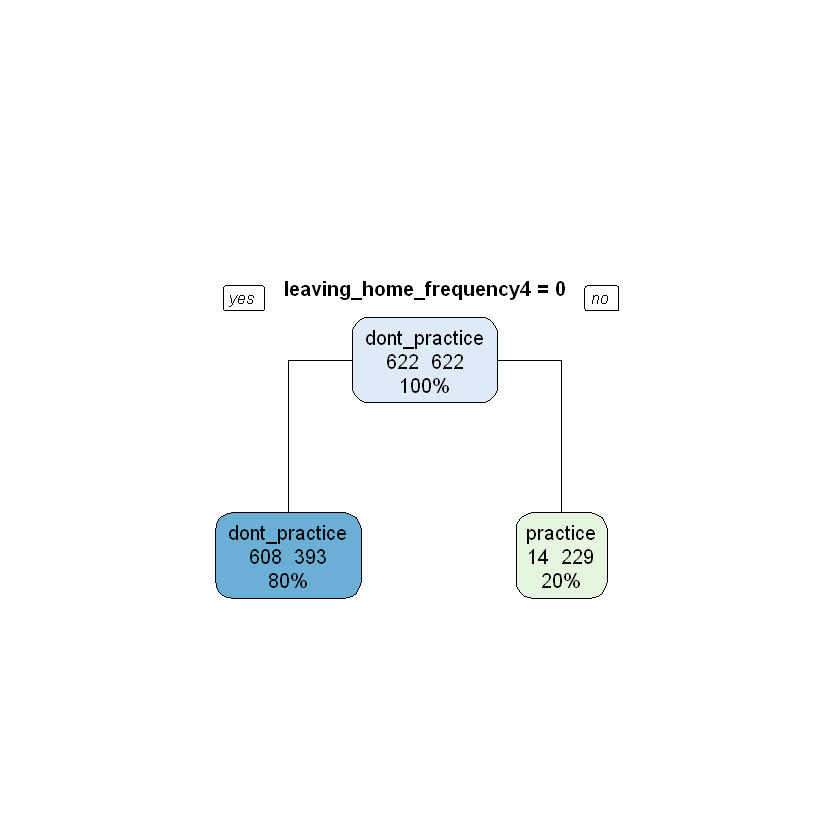

In [73]:
model <- fit_model(
    model_method="rpart",
    model_metric="FB",
    trControl_func = trainControl(method = "cv", summaryFunction=fbeta, classProbs = TRUE),
    train_data = treino.aug,
    test_data=teste,
    yname="PA_practice_during"
)
print(model$matrix)
rpart.plot(model$result$finalModel, type=1, extra=101)

# Decision tree for people with GAD or depression

## Filtering dataset and finding out the majority class


In [74]:
before_datase_disorders <- before_dataset[has_GAD_depression, ]
before_datase_disorders <- subset(before_datase_disorders, select = -c(GAD, depression))

print(table(before_datase_disorders[, "PA_practice_during"]))
dim(before_datase_disorders)




dont_practice      practice 
           49            97 


[1] 146  83

## Creating the dataset partition

In [75]:
set.seed(2)
lista_treino <- createDataPartition(before_datase_disorders$PA_practice_during, p=0.7, list=FALSE)
treino <- before_datase_disorders[lista_treino,]
teste <- before_datase_disorders[-lista_treino,]



## Applying augmentation into the training set

In [76]:
treino.aug <- data_augmentation(
    train_data=treino,
    yname="PA_practice_during",
    maj_class = "practice",
    min_classes = c("dont_practice"),
    ycol=match("PA_practice_during",names(before_datase_disorders))
)

table(treino.aug[, "PA_practice_during"])



dont_practice      practice 
           68            68 

## Kappa metric without augmentation

Confusion Matrix and Statistics

               Reference
Prediction      dont_practice practice
  dont_practice             4        6
  practice                 10       23
                                          
               Accuracy : 0.6279          
                 95% CI : (0.4673, 0.7702)
    No Information Rate : 0.6744          
    P-Value [Acc > NIR] : 0.7938          
                                          
                  Kappa : 0.0851          
                                          
 Mcnemar's Test P-Value : 0.4533          
                                          
            Sensitivity : 0.28571         
            Specificity : 0.79310         
         Pos Pred Value : 0.40000         
         Neg Pred Value : 0.69697         
             Prevalence : 0.32558         
         Detection Rate : 0.09302         
   Detection Prevalence : 0.23256         
      Balanced Accuracy : 0.53941         
                                          
       '

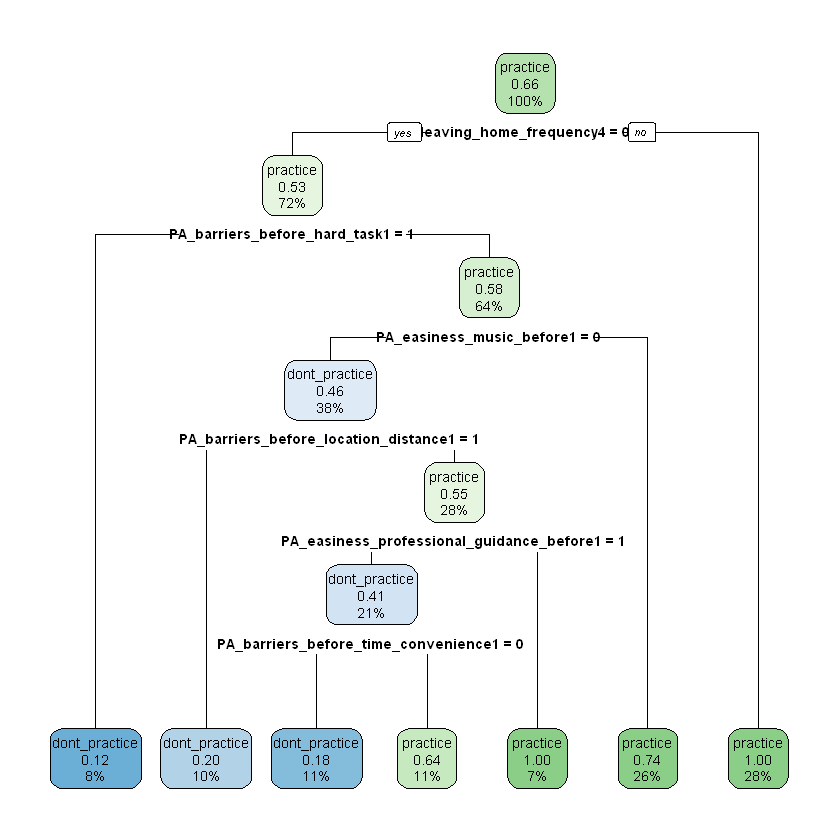

In [77]:
model <- fit_model(
    model_method="rpart",
    model_metric="Kappa",
    trControl_func = trainControl(method = "cv"),
    train_data = treino,
    test_data=teste,
    yname="PA_practice_during",
    length = 3
)
print(model$matrix)
# print(model$result)
rpart.plot(model$result$finalModel)



## Kappa metric with augmentation

Confusion Matrix and Statistics

               Reference
Prediction      dont_practice practice
  dont_practice            10       13
  practice                  4       16
                                          
               Accuracy : 0.6047          
                 95% CI : (0.4441, 0.7502)
    No Information Rate : 0.6744          
    P-Value [Acc > NIR] : 0.87178         
                                          
                  Kappa : 0.2281          
                                          
 Mcnemar's Test P-Value : 0.05235         
                                          
            Sensitivity : 0.7143          
            Specificity : 0.5517          
         Pos Pred Value : 0.4348          
         Neg Pred Value : 0.8000          
             Prevalence : 0.3256          
         Detection Rate : 0.2326          
   Detection Prevalence : 0.5349          
      Balanced Accuracy : 0.6330          
                                          
       '

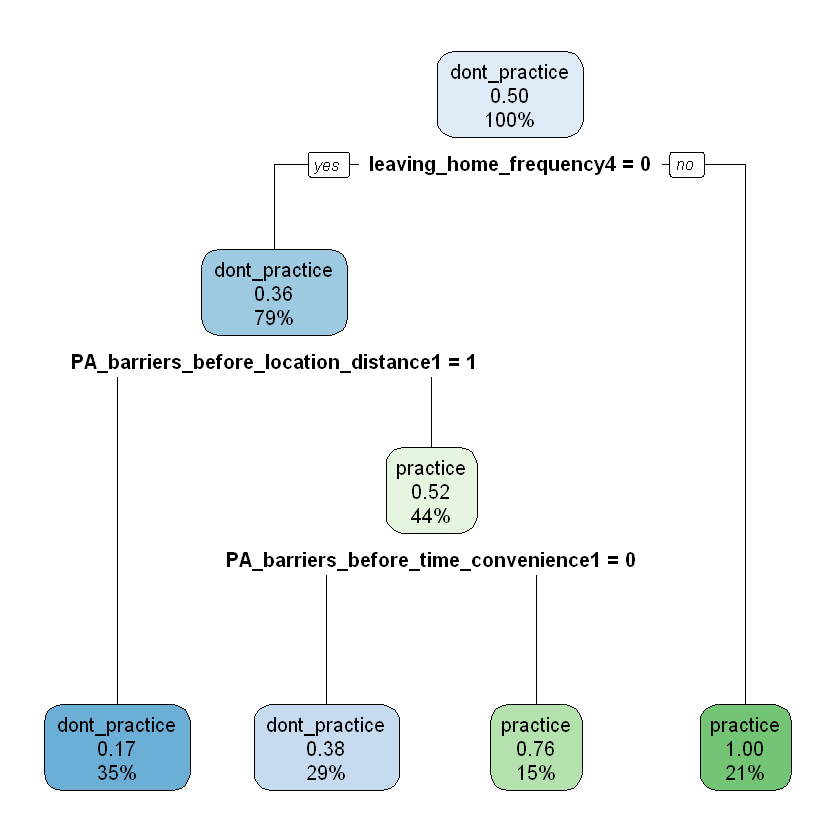

In [78]:
model <- fit_model(
    model_method="rpart",
    model_metric="Kappa",
    trControl_func = trainControl(method = "boot"),
    train_data = treino.aug,
    test_data=teste,
    yname="PA_practice_during",
    length=3
)
print(model$matrix)
rpart.plot(model$result$finalModel)